In [22]:
import pandas as pd
import seaborn as sns
from tabulabuilder import Result, RelayResult

df = pd.read_csv("improvements.csv")
df.head()

,Unnamed: 0,id,divsRank,finalRank,swimmer,swimmerage,school,event,seedTime,divsTime,...,divsSpeed,finalSpeed,attendance,eventName,seedToDivsTimeDelta,divsToCitiesTimeDelta,seedToCitiesTimeDelta,seedToDivsSpeedDelta,divsToCitiesSpeedDelta,seedToCitiesSpeedDelta
0,0,1,1.0,2.0,1,16,1,1,127.90,134.40,...,1.488095,1.469292,0,Girls Open 200m Freestyle,6.50,1.72,8.22,-0.075626,-0.018803,-0.094430
1,1,11,11.0,NaN,11,17,1,1,208.73,196.01,...,1.020356,NaN,75,Girls Open 200m Freestyle,-12.72,NaN,NaN,0.062180,NaN,NaN
2,2,19,3.0,2.0,19,17,1,2,133.80,138.40,...,1.445087,1.491202,8,Boys Open 200m Freestyle,4.60,-4.28,0.32,-0.049682,0.046115,-0.003566
3,3,21,5.0,6.0,21,16,1,2,166.68,156.61,...,1.277058,1.261670,1,Boys Open 200m Freestyle,-10.07,1.91,-8.16,0.077154,-0.015387,0.061766
4,4,33,1.0,1.0,33,15,1,3,31.10,31.40,...,1.592357,1.603078,0,Girls 15 50m Backstroke,0.30,-0.21,0.09,-0.015360,0.010721,-0.004639


c:\Users\tang-\Documents\Python\skynet2\skynetvenv\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
c:\Users\tang-\Documents\Python\skynet2\skynetvenv\lib\site-packages\seaborn\regression.py:282: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
c:\Users\tang-\Documents\Python\skynet2\skynetvenv\lib\site-packages\numpy\linalg\linalg.py:1974: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


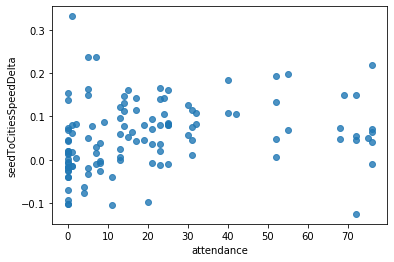

In [37]:
sns.regplot("attendance", "seedToCitiesSpeedDelta", df, robust=True)

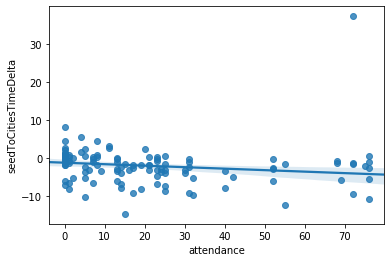

In [12]:
sns.regplot("attendance", "seedToCitiesTimeDelta", df, robust=True)

In [31]:
divsResults = Result.select().where((Result.school == 1) & (Result.year == 2019) & (Result.divsTime.is_null(False))).objects()
divsSwimmers = {result.swimmer for result in divsResults}
len(divsSwimmers)

92

In [32]:
relayDivsResults = RelayResult.select().where((RelayResult.school == 1) & (RelayResult.year == 2019) & (RelayResult.divsTime.is_null(False))).objects()
for result in relayDivsResults:
    divsSwimmers |= {rp.swimmer for rp in result.swimmers}
len(divsSwimmers)

92

In [29]:
citiesResults = Result.select().where((Result.school == 1) & (Result.year == 2019) & (Result.finalTime.is_null(False))).objects()
citiesSwimmers = {result.swimmer for result in citiesResults}
len(citiesSwimmers)

68

In [30]:
relayCitiesResults = RelayResult.select().where((RelayResult.school == 1) & (RelayResult.year == 2019) & (RelayResult.finalTime.is_null(False))).objects()
for result in relayCitiesResults:
    citiesSwimmers |= {rp.swimmer for rp in result.swimmers}
len(citiesSwimmers)

70